In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('heart_data/processed.cleveland.data')
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')
data = data.dropna()

predictors = data.drop("target",axis=1)
target = data["target"].replace([2,3,4], 1)
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [5]:
from sklearn.svm import SVC

svc = SVC(random_state=0)
search_space = {
    'gamma': ['linear', 'scale'],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [6]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(svc, search_space, verbose=0, refit=True, n_jobs=-1)
best_model = clf.fit(X_train, Y_train)
print('complete')

complete


/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/svm/_base.py", line 180, in fit
    self._validate_params()
  File "/home/lucmac/anaconda3/envs/asn1/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_par

In [7]:
print('Best kernel:', best_model.best_estimator_.get_params()['kernel'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])

Best kernel: poly
Best gamma: scale


In [8]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model.best_estimator_, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=[np.linspace(0.01, 1.0, 50)], verbose=1, random_state=42)

[learning_curve] Training set sizes: [  1   5   9  13  17  20  24  28  32  36  40  43  47  51  55  59  62  66
  70  74  78  82  85  89  93  97 101 104 108 112 116 120 124 127 131 135
 139 143 146 150 154 158 162 166 169 173 177 181 185 189]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.5s finished


In [16]:
test2 = np.copy(test_scores)
test2 = test2[~np.isnan(test_scores)]
print(test2.max())

0.7872340425531915


In [18]:
from sklearn.metrics import confusion_matrix

y_pred = best_model.best_estimator_.predict(X_test)
confmat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print(confmat)

[[26  4]
 [17 13]]


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=Y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=Y_test, y_pred=y_pred))

Precision: 0.765
Recall: 0.433
F1: 0.553


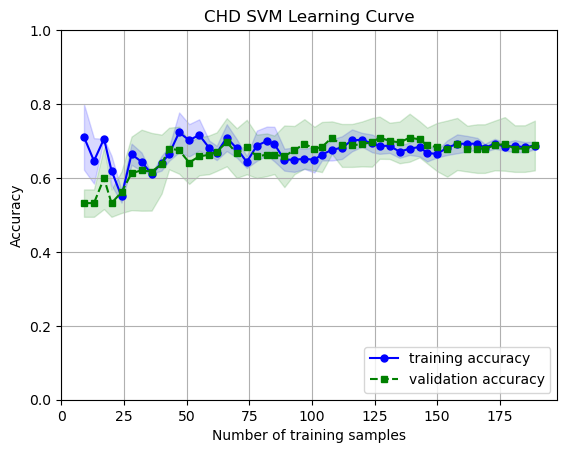

In [12]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('CHD SVM Learning Curve')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.0])
plt.show()

In [10]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
val_train_scores, val_test_scores = validation_curve(best_model.best_estimator_, X_train, Y_train, param_name='gamma', param_range=param_range, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(val_train_scores, axis=1)
train_std = np.std(val_train_scores, axis=1)
test_mean = np.mean(val_test_scores, axis=1)
test_std = np.std(val_test_scores, axis=1)

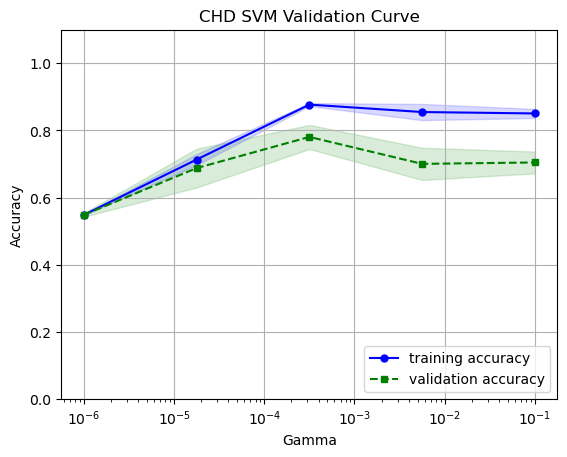

In [11]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Gamma')
plt.ylabel('Accuracy')
plt.title('CHD SVM Validation Curve')
plt.ylim([0.0, 1.1])
plt.show()